### INSTRUCTIONS

For this assignment, you must use the AWS VM that has been assigned to you.

Read through the entire framework below once. Note the parts you need to code up.


In [1]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES
!pip install lime

In [2]:
##### DO NOT EDIT THIS CELL!!!
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications 
from tensorflow.keras import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
from lime import lime_image

# Load ResNet50 model pre-trained on ImageNet dataset
model = applications.ResNet50(weights='imagenet')

# Function to preprocess image for ResNet50
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('double') 
    return preprocess_input(img_array)

# Function to predict class probabilities using ResNet50
def predict_with_resnet50(image_path):
    preprocessed_image = preprocess_image(image_path)
    preds = model.predict(preprocessed_image)
    return decode_predictions(preds, top=3)[0]

# Load the image you want to classify
image_path = 'images.jpg'

# Predict class probabilities using ResNet50
preds = predict_with_resnet50(image_path)
print("ResNet50 Predictions:")
for pred in preds:
    print(pred[1], ':', pred[2])

ResNet50 Predictions:
sulphur_butterfly : 0.26656827
packet : 0.08242094
mailbag : 0.074026726


  0%|          | 0/1000 [00:00<?, ?it/s]

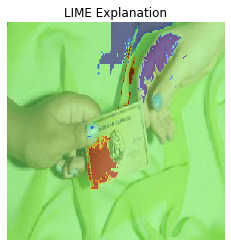

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


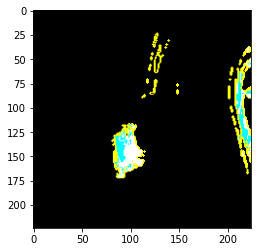

In [3]:
##### THIS IS THE ONLY CELL YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

from skimage.segmentation import mark_boundaries
# Load the image as an array, keep all the parameters at defaults
image_array = preprocess_image(image_path)


### (1.1) ADD YOUR CODE HERE
# create Lime explainer object using LimeImageExplainer() class from lime_image.
#give it a name "explainer"
explainer = lime_image.LimeImageExplainer()## add your code here"

#refer to this useful documentation
##https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=limeimageexplainer#lime.lime_image.LimeImageExplainer




#Next we apply explain_instance() to explainer object created in the step above
#Call this object "explanation"

explanation = explainer.explain_instance(image_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
#Refer to this helpful documentation to learn more about explain_instance() 
#https://lime-ml.readthedocs.io/en/latest/lime.html#lime.lime_image.LimeImageExplainer.explain_instance



# Get the explanation for the top predicted class and load them into temp, mask

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)



# Plot the original image with explanations
plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


### (1.2) ADD YOUR CODE HERE

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
# Examine the code that was used to create temp, mask above 
#Copy the code here and modify it to get the explanation for the top predicted class for ONLY the AREAS CONTRIBUTING to prediction

#Use this helpful link to understand better how get_image_and_mask() function works https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=get_image_and_mask#lime.lime_image.ImageExplanation.get_image_and_mask


# Plot the original image with explanations 
plt.imshow(mark_boundaries(temp, mask))




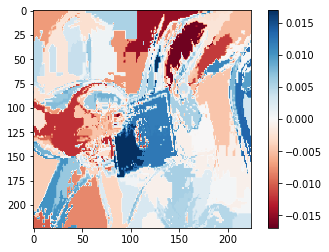

In [4]:
##### DO NOT EDIT THIS CELL!!!

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]
#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### (1.3) Reflect on the output images produced in cells 11 and 12
 #  What do green areas represent on the second image in cell 11? What does black areas represent on the second image in cell 11?
 #  How do you interpret the blue vs red colored segments in the output image of the cell 12?
###############
#PASTE YOUR ANSWER HERE (1-3 sentences summarizing the answer are enough)
The images seem to be output from a LIME (Local Interpretable Model-agnostic Explanations) analysis, which is used to explain predictions of machine learning models.

In the first image, the superimposed colored areas over the original image indicate the regions that the model is focusing on to make its prediction. Typically in LIME:

Green areas may represent parts of the image that contribute positively towards the predicted class.
Yellow areas might indicate regions that have a strong positive influence on the prediction.
Black areas are likely showing parts of the image that LIME has masked out or considered as background and therefore not contributing to the model's decision-making process.
In the second heatmap image:

Blue colored segments generally indicate features that positively support the model's prediction for the given class. These are the features that the model finds supportive or indicative of its decision.
Red colored segments typically indicate features that work against the prediction for the given class. These might be areas the model finds confusing or indicative of a different class than the one predicted.
In the context of the heatmap, the color intensity reflects the strength of the contribution, with brighter colors signifying stronger influence, positive or negative, on the model's decision-making process. The heatmap allows us to see which specific features within the image are influencing the model's prediction the most, providing insight into the model's behavior.
###############